## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read cost_of_living.csv file

In [2]:
# Read the CSV file into a pandas DataFrame
df_cost_of_living = pd.read_csv('cost_of_living.csv')
df_cost_of_living.head(2)

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,NaN,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79


In [3]:
# Split the 'City' column and extract only the city and country name
df_cost_of_living.rename(columns={"City": 'City_Country'}, inplace=True)
split_data = df_cost_of_living['City_Country'].str.split(', ', expand=True)
df_cost_of_living['City'] = split_data[0]
# Rename the columns
split_data.rename(columns={0: 'Column1', 1: 'Column2', 2: 'Column3'}, inplace=True)

In [4]:
#there are some records which contain city,code,country such as (Honolulu, HI, United States)
def custom_logic(row):
    if pd.isnull(row['Column3']):
        return row['Column2']
    else:
        return row['Column3']


In [5]:
df_cost_of_living['Country'] = split_data.apply(custom_logic, axis=1)

In [6]:
df_cost_of_living['Country'].value_counts()

United States     95
India             46
United Kingdom    34
Canada            28
Germany           26
                  ..
Ethiopia           1
Senegal            1
Oman               1
Latvia             1
Afghanistan        1
Name: Country, Length: 127, dtype: int64

In [7]:
df_cost_of_living.shape

(578, 10)

In [8]:
df_cost_of_living.isnull().sum()

Rank                              578
City_Country                        0
Cost of Living Index                0
Rent Index                          0
Cost of Living Plus Rent Index      0
Groceries Index                     0
Restaurant Price Index              0
Local Purchasing Power Index        0
City                                0
Country                             0
dtype: int64

In [9]:
df_cost_of_living = df_cost_of_living.drop("Rank",axis=1) # drop Rank : all values of null

In [10]:
#Function to plot top 10 countries with highest index values
def plot_top_countries_by_indices(data, index_column_names):
    num_plots = len(index_column_names)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()
    
    for i, index_column_name in enumerate(index_column_names):
        # Calculate the average of the specified index for each country
        average_index = data.groupby('Country')[index_column_name].mean()

        # Get the top 10 countries with the highest average index
        top_10_countries = average_index.sort_values(ascending=False).head(10)

        # Plot bar plot
        ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, ax=axes[i])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_xlabel('Country')
        ax.set_ylabel(f'Average: {index_column_name}')
        ax.set_title(f'Countries with Highest Average {index_column_name}')
        
        # Add average values on top of each bar
        for j, value in enumerate(top_10_countries.values):
            ax.text(j, value + 1, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

    # Remove unused axes
    for k in range(num_plots, len(axes)):
        axes[k].remove()
    plt.tight_layout()
    plt.show()

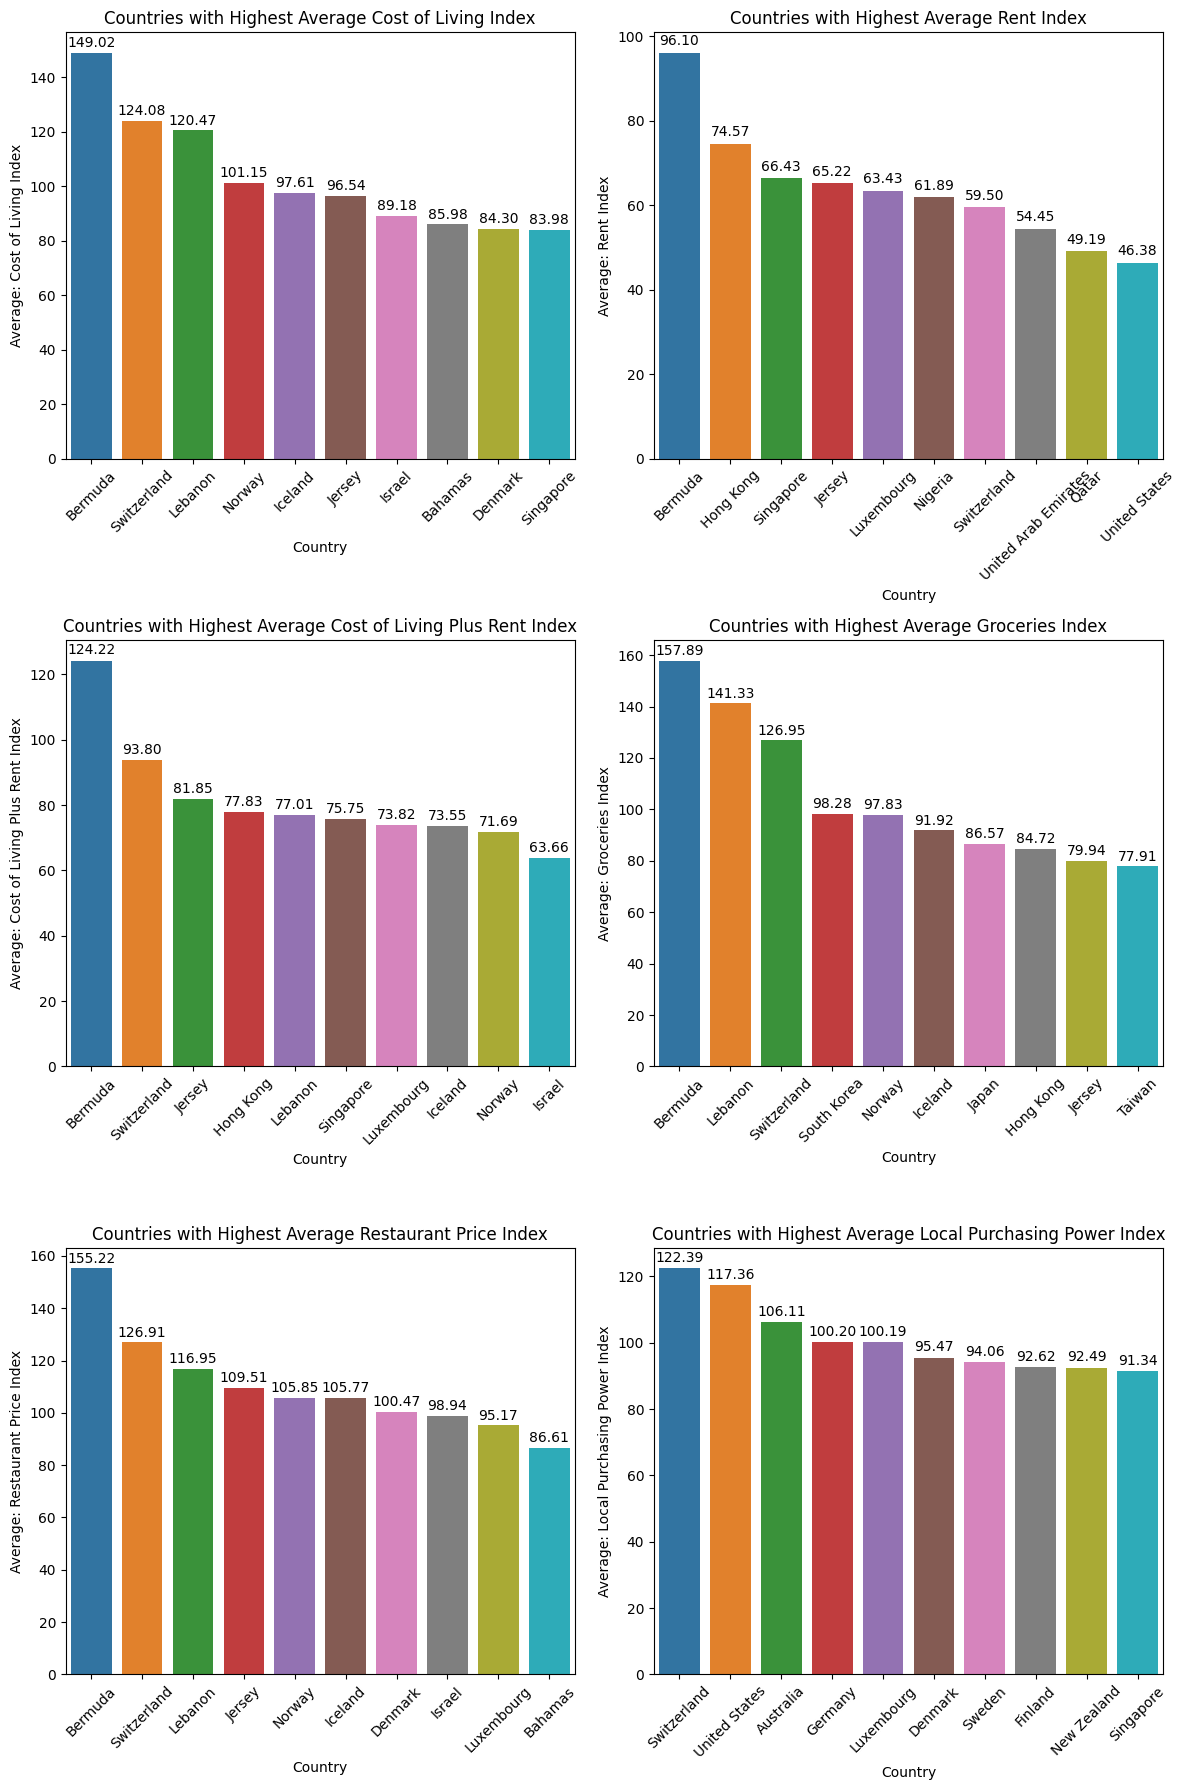

In [11]:
# Call the function with multiple index columns
index_columns = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 
                 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']

plot_top_countries_by_indices(df_cost_of_living, index_columns)

## Read country_codes.xlsx file 

In [12]:
df_country_code = pd.read_excel('country_codes_p.xlsx')

df_country_code.head(2)

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8


In [13]:
df_country_code['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas (the)', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory (the)', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands (the)',
       'Central African Republic (the)', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Cocos (Keeling) Islands (the)', 'Colombia',
       'Comoros (the)', 'Congo (the Democratic Republic of the)',
       'Congo (the)', 'Cook Islands (the)', 'Costa Rica', 'Croatia',
       'Cuba', 'Curaçao', 'C

In [14]:
# Remove brackets and text inside brackets from the 'Country' column
df_country_code['Country'] = df_country_code['Country'].str.replace(r'\s*\([^)]*\)', '')
# df_country_code['Country'].unique()

## Merge datasets: cost of living and country codes
In order to join `cost_of_living.csv` with `ds_salaries.csv`, there should be a common column.
There is a column `employee_residence` in the `ds_salaries` dataset through which both datasets can be joined. For that, we have to take `Alpha-2 code` from `country codes` dataset.

In [15]:
# Merge the datasets based on the 'country' column
mergedDF_livingCost_CountryCode = df_cost_of_living.merge(df_country_code[['Country', 'Alpha-2 code']], 
                                                          on='Country', how='left')

## Read ds_salaries.csv file 

In [16]:
df_ds_salaries = pd.read_csv('ds_salaries.csv')
df_ds_salaries.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [17]:
df_ds_salaries['job_title'].unique() # number of unique job titles

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [18]:
# Filter job titles = Data Scientists
desired_titles = ['Data Scientist', 'Lead Data Scientist', 'Data Science Consultant',
                 'Director of Data Science', 'Principal Data Scientist',
                 'Data Science Manager', 'Applied Data Scientist',
                 'Data Science Engineer', 'Head of Data Science',
                 'Staff Data Scientist']

df_dataScientists = df_ds_salaries[df_ds_salaries['job_title'].isin(desired_titles)]

# Replace values in the 'experience_level' column
experience_mapping = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive-level'
}
df_dataScientists['experience_level'] = df_dataScientists['experience_level'].replace(experience_mapping)


# Filter out rows where employee residence and company location are the same
df_dataScientists = df_dataScientists[df_dataScientists['employee_residence'] == df_dataScientists['company_location']]
df_dataScientists.shape

(175, 12)

In [19]:
df_dataScientists["job_title"].value_counts()

Data Scientist              132
Data Science Manager         10
Principal Data Scientist      7
Data Science Consultant       6
Director of Data Science      6
Applied Data Scientist        4
Head of Data Science          4
Lead Data Scientist           3
Data Science Engineer         2
Staff Data Scientist          1
Name: job_title, dtype: int64

In [20]:
# Calculate average salary based on country
average_salary_by_country = df_dataScientists.groupby('employee_residence')['salary_in_usd'].mean()
df_dataScientists['Avg_salary_byCountry'] = df_dataScientists['employee_residence'].map(average_salary_by_country)


In [21]:
# Calculate average salary based on exp_level
average_salary_by_experience = df_dataScientists.groupby('experience_level')['salary_in_usd'].mean()
df_dataScientists['Avg_salary_experience_level'] = df_dataScientists['experience_level'].map(average_salary_by_experience)


In [22]:
# df_dataScientists.tail()

## Merge datasets: ds_salaries and cost_of_living
Both datasets are joined through `employee_residence` and `Alpha-2 code`

In [23]:
mergedDF_dataScientists_livingCost = df_dataScientists.merge(mergedDF_livingCost_CountryCode, 
                                                             left_on="employee_residence",
                                                              right_on="Alpha-2 code", how='left')


In [24]:
#drop duplicates
mergedDF_dataScientists_livingCost = mergedDF_dataScientists_livingCost.drop_duplicates(subset='City_Country')
mergedDF_dataScientists_livingCost.shape

(348, 24)

In [25]:
# drop irrelevant columns
mergedDF_dataScientists_livingCost = mergedDF_dataScientists_livingCost.drop(['Unnamed: 0','salary',
                                    'salary_currency', 'company_size','employment_type',
                                 'employee_residence', 'remote_ratio', 'company_location'],axis=1)

In [26]:
mergedDF_dataScientists_livingCost["job_title"].value_counts()

Data Scientist              234
Lead Data Scientist          99
Head of Data Science          8
Data Science Engineer         4
Director of Data Science      3
Name: job_title, dtype: int64

In [27]:
mergedDF_dataScientists_livingCost.head(2)

,work_year,experience_level,job_title,salary_in_usd,Avg_salary_byCountry,Avg_salary_experience_level,City_Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,City,Country,Alpha-2 code
0,2020,Mid-level,Data Scientist,79833,102572.5,92171.9,"Munich, Germany",77.52,47.34,63.37,66.77,76.82,95.16,Munich,Germany,DE
1,2020,Mid-level,Data Scientist,79833,102572.5,92171.9,"Frankfurt, Germany",72.78,39.15,57.02,58.44,66.41,106.89,Frankfurt,Germany,DE


In [28]:
mergedDF_dataScientists_livingCost.describe().T # shows Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
work_year,348.0,2020.353448,0.624952,2020.000000,2020.000000,2020.00,2021.000000,2022.000000
salary_in_usd,348.0,94542.454023,64119.137440,2859.000000,40481.000000,76958.00,190000.000000,190000.000000
Avg_salary_byCountry,348.0,90548.203417,53494.177085,2859.000000,34642.681818,89999.00,160717.553398,168000.000000
Avg_salary_experience_level,348.0,111474.962538,38502.243190,59278.555556,92171.900000,92171.90,159292.911392,215191.777778
Cost of Living Index,347.0,61.035130,21.206311,20.790000,41.760000,67.71,73.150000,131.240000
Rent Index,347.0,30.270951,19.034023,2.940000,16.415000,28.82,39.740000,108.420000
Cost of Living Plus Rent Index,347.0,46.614294,19.091044,12.730000,30.895000,49.81,56.840000,102.190000
Groceries Index,347.0,57.497262,22.046408,21.430000,37.290000,60.07,71.415000,137.070000
Restaurant Price Index,347.0,59.196571,23.981937,11.390000,38.085000,66.41,73.800000,132.520000
Local Purchasing Power Index,347.0,83.997896,32.805671,8.300000,57.050000,86.35,107.140000,172.980000


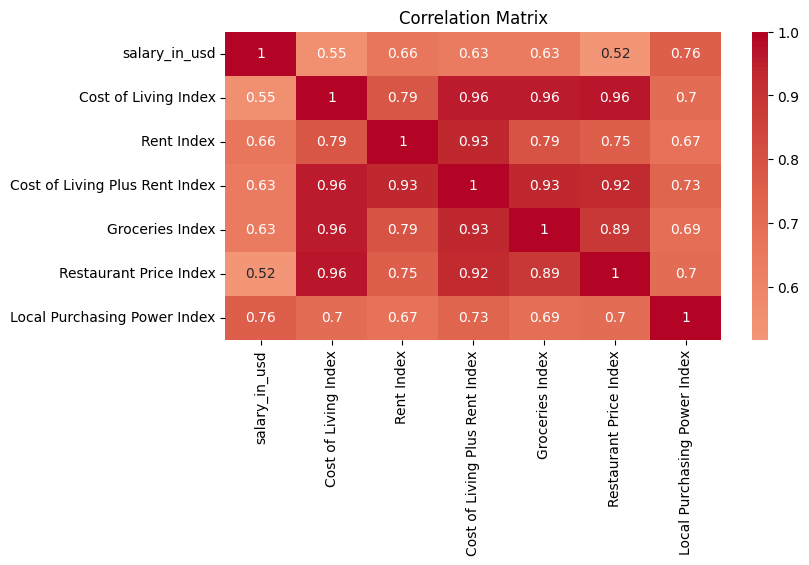

In [29]:
# Correlation of salary and each index
correlation_matrix = mergedDF_dataScientists_livingCost[['salary_in_usd', 'Cost of Living Index', 
                        'Rent Index','Cost of Living Plus Rent Index','Groceries Index',
                        'Restaurant Price Index', 'Local Purchasing Power Index']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

A correlation coefficient of 1 or closer to 1 means that there is a perfect positive correlation between the two variables. A correlation coefficient of -1 or closer to -1 means that there is a perfect negative correlation between the two variables. A correlation coefficient of 0 means that there is no correlation between the two variables.

The coefficient between the `salary` and `local purchasing power` is `0.76`. This means that there is a positive correlation between these two variables. In other words, as `salary` increases, the `local purchasing power index` also increases.

## Read Levels_Fyi_Salary_Data.csv file 

In [30]:
df_levels_fyi_salaries = pd.read_csv('Levels_Fyi_Salary_Data.csv')
df_levels_fyi_salaries.head(2)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [31]:
#filter out  data scientists data
df_levels_fyi_salaries = df_levels_fyi_salaries[df_levels_fyi_salaries['title'] == 'Data Scientist']
# Split the 'location' column and extract only the city name
split_data2 = df_levels_fyi_salaries['location'].str.split(',', expand=True)
df_levels_fyi_salaries['City'] = split_data2[0]

## Merge datasets: df_levels_fyi_salaries and cost_of_living
Both datasets are joined through `City` column

In [32]:
# Merge the datasets based on the 'City' column
df_levels_fyi_salaries = df_levels_fyi_salaries.merge(df_cost_of_living,on='City', how='left')
df_levels_fyi_salaries = df_levels_fyi_salaries.reset_index()

In [33]:
df_levels_fyi_salaries.isna().sum()

index                                0
timestamp                            0
company                              0
level                                7
title                                0
totalyearlycompensation              0
location                             0
yearsofexperience                    0
yearsatcompany                       0
tag                                  6
basesalary                           0
stockgrantvalue                      0
bonus                                0
gender                             880
otherdetails                       794
cityid                               0
dmaid                                0
rowNumber                            0
Masters_Degree                       0
Bachelors_Degree                     0
Doctorate_Degree                     0
Highschool                           0
Some_College                         0
Race_Asian                           0
Race_White                           0
Race_Two_Or_More         

In [34]:
df_levels_fyi_salaries = df_levels_fyi_salaries.dropna() #drop null values
df_levels_fyi_salaries.shape

(684, 39)

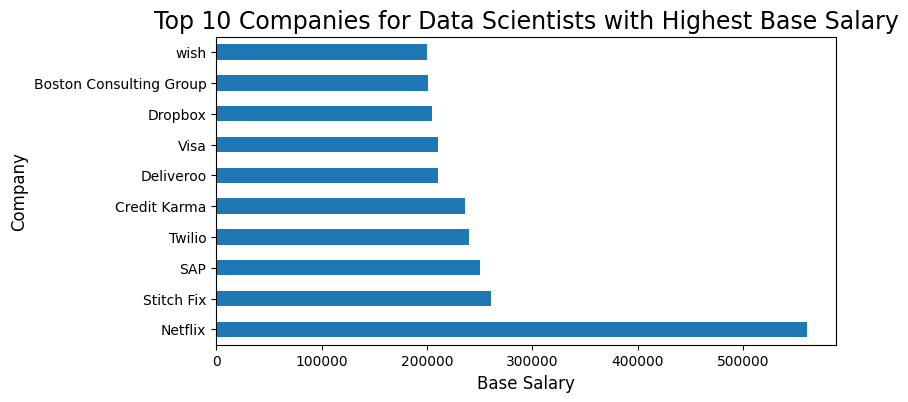

In [35]:
grouped_df_by_company = df_levels_fyi_salaries.groupby(["company"]).mean()

plt.figure(figsize=(8,4))
grouped_df_by_company.sort_values(by="basesalary", ascending=False).head(10)["basesalary"].plot(kind="barh")
plt.title("Top 10 Companies for Data Scientists with Highest Base Salary", size=17)
plt.xlabel("Base Salary", size=12)
plt.ylabel("Company", size=12)
plt.show()

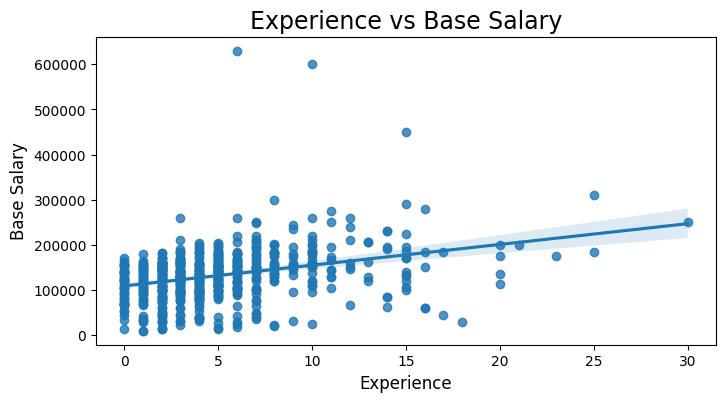

In [36]:
plt.figure(figsize=(8,4))
sns.regplot(x=df_levels_fyi_salaries["yearsofexperience"], y=df_levels_fyi_salaries["basesalary"])
plt.title("Experience vs Base Salary", size=17)
plt.xlabel("Experience", size=12)
plt.ylabel("Base Salary", size=12)
plt.show()

With increase in experience, base salary also increases

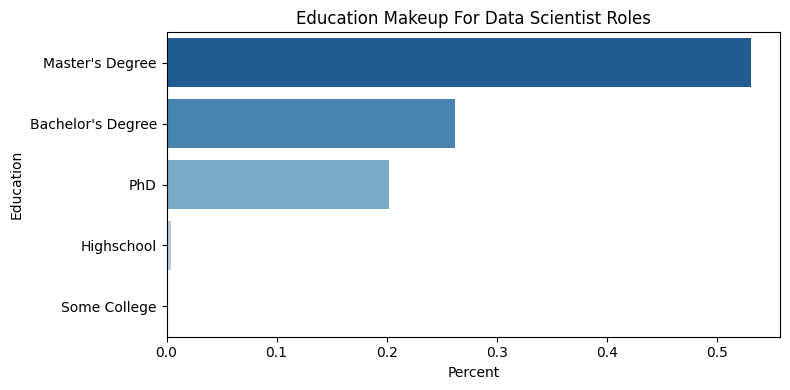

In [37]:
education_counts = (   
    df_levels_fyi_salaries.groupby('Education').size()
    .sort_values(ascending=False)
    .reset_index(name='n')
)

# Calculate the percentage and create the bar plot
education_counts['percent'] = education_counts['n'] / education_counts['n'].sum()

plt.figure(figsize=(8, 4))
sns.barplot(data=education_counts, x='percent', y='Education', palette='Blues_r')
plt.xlabel('Percent')
plt.ylabel('Education')
plt.title('Education Makeup For Data Scientist Roles')
plt.tight_layout()
plt.show()

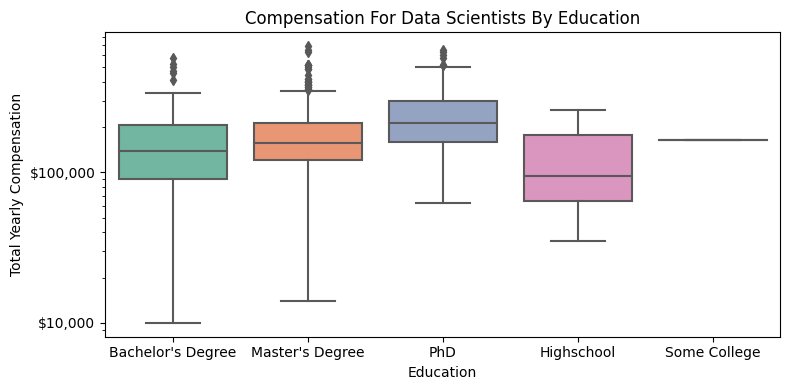

In [38]:
from matplotlib.ticker import FuncFormatter
# Define a function to format y-axis as dollars
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Create the box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_levels_fyi_salaries, x='Education', y='totalyearlycompensation', palette='Set2')
plt.yscale('log')  # Use log scale for y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))  # Format y-axis as dollars
plt.xlabel('Education')
plt.ylabel('Total Yearly Compensation')
plt.title('Compensation For Data Scientists By Education')
plt.tight_layout()
plt.show()

In [39]:
# Calculate average base_salary based on Education
average_salary_by_education = df_levels_fyi_salaries.groupby('Education')['basesalary'].mean()
df_levels_fyi_salaries['average_salary_by_education'] = df_levels_fyi_salaries['Education'].map(average_salary_by_education)


In [40]:
df_levels_fyi_salaries.head(2)

,index,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,...,City,City_Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,average_salary_by_education
990,990,7/6/2020 17:16:12,Google,L3,Data Scientist,170000,"San Francisco, CA",3.0,3.0,ML / AI,...,San Francisco,"San Francisco, CA, United States",93.91,108.42,100.72,97.05,93.40,133.16,United States,112335.195531
993,993,7/6/2020 22:31:17,PayPal,T24,Data Scientist,216000,"San Jose, CA",2.0,0.0,ML / AI,...,San Jose,"San Jose, CA, United States",73.71,82.30,77.74,70.53,74.25,157.39,United States,130787.878788


## Top 5 Cities/Countries where salary will go the farthest with respect to each individual index 

In [41]:
# Function to calculate how far the salary goes with respect to a specific index (cities and countries)
def calculate_affordability(data, index_column_name, salary_column_name):
    reciprocal_index = 1 / data[index_column_name]
    affordability = reciprocal_index * data[salary_column_name]
    if salary_column_name =="salary_in_usd":
        data[f'Affordability {index_column_name}'] = affordability
    elif salary_column_name =="Avg_salary_byCountry":
        data[f'Avg_Affordability_byContry {index_column_name}'] = affordability #Based on country-wise average salary
    elif salary_column_name =="Avg_salary_experience_level":
        data[f'Avg_Affordability_Exp_level {index_column_name}'] = affordability #Based on exp_level average salary
    else:
        data[f'Avg_Affordability_Education_level {index_column_name}'] = affordability #Based on education_level average salary
        


In [42]:
# Calculate affordability for different indices
index_columns = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index']

# for cities
for column in index_columns:
    calculate_affordability(mergedDF_dataScientists_livingCost, column, 'salary_in_usd')


In [43]:
# for countries
for column in index_columns:
    calculate_affordability(mergedDF_dataScientists_livingCost, column, 'Avg_salary_byCountry')


In [44]:
# Finding top cities with highest value for each index
city_affordability = {}
for column in index_columns:
    city_affordability[column] = mergedDF_dataScientists_livingCost.nlargest(5, f'Affordability {column}')\
                                                    [['Country', 'City','City_Country', f'Affordability {column}']]


In [45]:
# Top countries with highest value for each index
country_affordability = {}

for column in index_columns:
    top_affordability = mergedDF_dataScientists_livingCost.sort_values(by=f'Avg_Affordability_byContry {column}', ascending=False)\
                                                            [['Country', 'City_Country', f'Avg_Affordability_byContry {column}']]
    
    unique_countries = top_affordability['Country'].unique()  # Get unique countries
    
    # Iterate through unique countries 
    for country in unique_countries:
        country_rows = top_affordability[top_affordability['Country'] == country]
        country_affordability[column] = top_affordability.groupby('Country').head(1)
                                                                
   
    country_affordability[column] = country_affordability[column].reset_index(drop=True)


In [46]:
city_dataframes = list(city_affordability.values())
top5_city_livingCost = city_dataframes[0]
top5_city_rent = city_dataframes[1]
top5_city_livingplusRent = city_dataframes[2]
top5_city_groceries = city_dataframes[3]
top5_city_restaurantPrice = city_dataframes[4]
top5_city_localPurchasingPower = city_dataframes[5]

In [47]:
country_dataframes = list(country_affordability.values())
top5_Country_livingCost = country_dataframes[0].head()
top5_Country_rent = country_dataframes[1].head()
top5_Country_livingplusRent = country_dataframes[2].head()
top5_Country_groceries = country_dataframes[3].head()
top5_Country_restaurantPrice = country_dataframes[4].head()
top5_Country_localPurchasingPower = country_dataframes[5].head()

In [48]:
#function to plot top 5
def plot_index(df,location_column,index_column_name):
    plt.figure(figsize=(8, 4))
    plt.barh(df[location_column], df[index_column_name], color='skyblue')
    plt.xlabel(index_column_name)
    if location_column=="City_Country":
        plt.title('Top 5 Cities for Data Scientists with Higher '+index_column_name)
    else:
        plt.title('Top 5 Countries for Data Scientists with Higher '+index_column_name)
        
    plt.show()

### Top 5 Cities with respect to Cost of Living Index

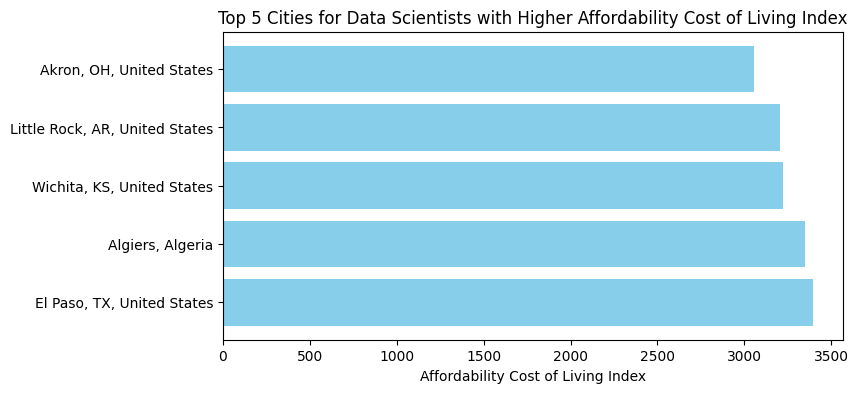

,Country,City,City_Country,Affordability Cost of Living Index
120,United States,El Paso,"El Paso, TX, United States",3397.711016
8793,Algeria,Algiers,"Algiers, Algeria",3351.206434
119,United States,Wichita,"Wichita, KS, United States",3224.711473
118,United States,Little Rock,"Little Rock, AR, United States",3206.209922
117,United States,Akron,"Akron, OH, United States",3054.662379


In [49]:
plot_index(top5_city_livingCost,'City_Country','Affordability Cost of Living Index')
top5_city_livingCost

### Top 5 Cities with respect to Cost of Rent Index

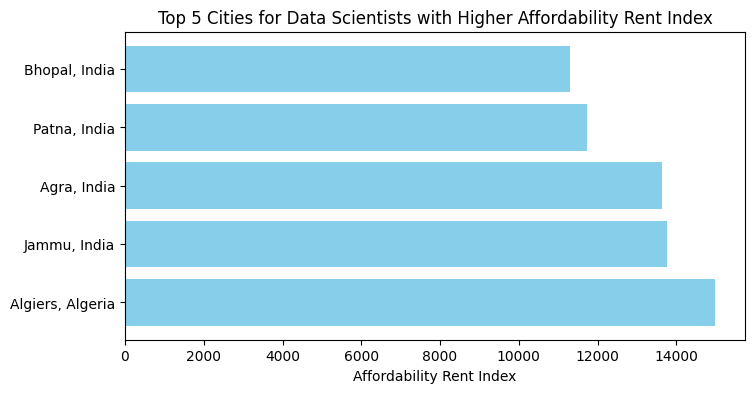

,Country,City,City_Country,Affordability Rent Index
8793,Algeria,Algiers,"Algiers, Algeria",14992.503748
172,India,Jammu,"Jammu, India",13769.047619
171,India,Agra,"Agra, India",13629.966330
164,India,Patna,"Patna, India",11733.623188
167,India,Bhopal,"Bhopal, India",11307.541899


In [50]:
plot_index(top5_city_rent,'City_Country','Affordability Rent Index')
top5_city_rent

### Top 5 Cities with respect to Cost of Living Plus Rent Index

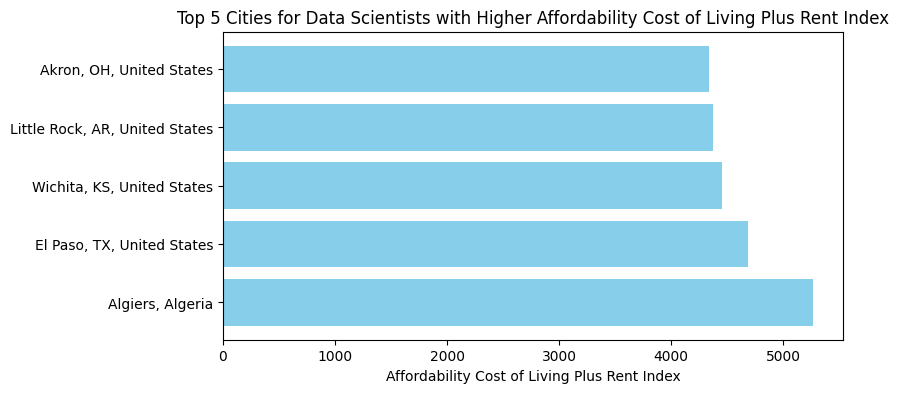

,Country,City,City_Country,Affordability Cost of Living Plus Rent Index
8793,Algeria,Algiers,"Algiers, Algeria",5268.703899
120,United States,El Paso,"El Paso, TX, United States",4684.418146
119,United States,Wichita,"Wichita, KS, United States",4452.777127
118,United States,Little Rock,"Little Rock, AR, United States",4369.825207
117,United States,Akron,"Akron, OH, United States",4339.881224


In [51]:
plot_index(top5_city_livingplusRent,'City_Country','Affordability Cost of Living Plus Rent Index')
top5_city_livingplusRent

### Top 5 Cities with respect to Groceries Index

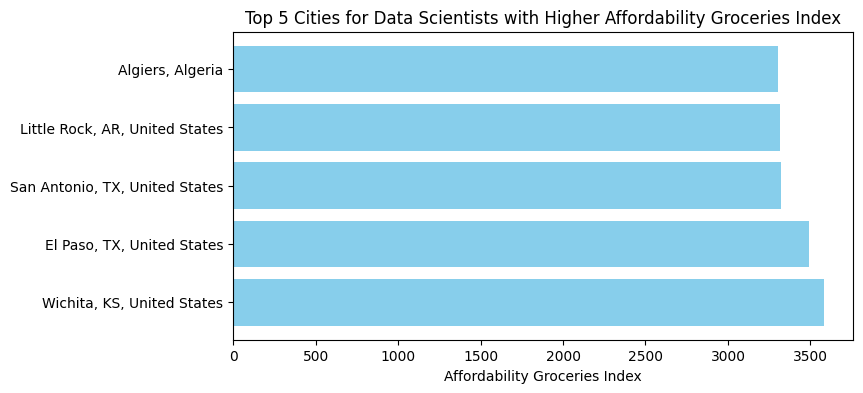

,Country,City,City_Country,Affordability Groceries Index
119,United States,Wichita,"Wichita, KS, United States",3579.502638
120,United States,El Paso,"El Paso, TX, United States",3489.439853
114,United States,San Antonio,"San Antonio, TX, United States",3318.777293
118,United States,Little Rock,"Little Rock, AR, United States",3317.039106
8793,Algeria,Algiers,"Algiers, Algeria",3305.785124


In [52]:
plot_index(top5_city_groceries,'City_Country','Affordability Groceries Index')
top5_city_groceries

### Top 5 Cities with respect to Restaurant Price Index

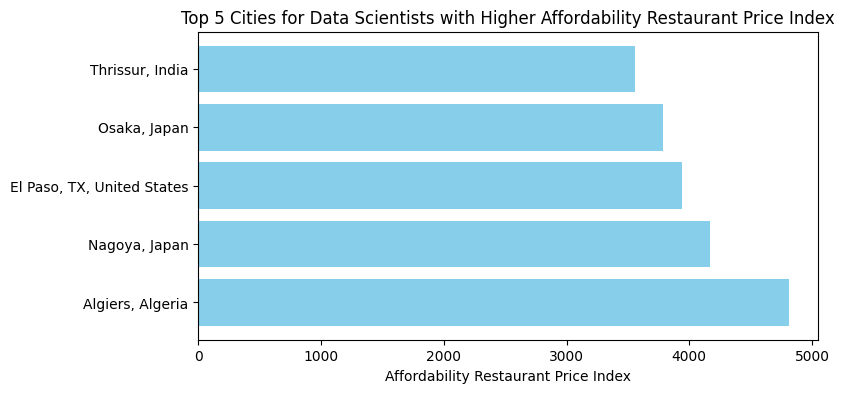

,Country,City,City_Country,Affordability Restaurant Price Index
8793,Algeria,Algiers,"Algiers, Algeria",4810.004810
2126,Japan,Nagoya,"Nagoya, Japan",4171.840079
120,United States,El Paso,"El Paso, TX, United States",3943.545039
2125,Japan,Osaka,"Osaka, Japan",3782.080144
175,India,Thrissur,"Thrissur, India",3554.082529


In [53]:
plot_index(top5_city_restaurantPrice,'City_Country','Affordability Restaurant Price Index')
top5_city_restaurantPrice

### Top 5 Cities with respect to Local Purchasing Power Index

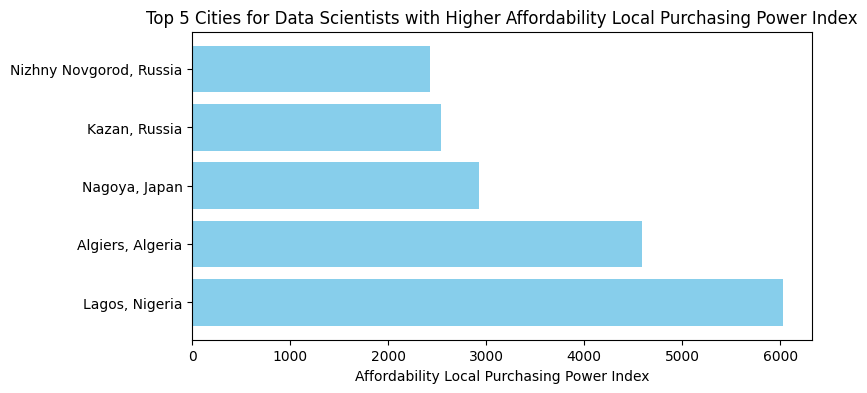

,Country,City,City_Country,Affordability Local Purchasing Power Index
1417,Nigeria,Lagos,"Lagos, Nigeria",6024.096386
8793,Algeria,Algiers,"Algiers, Algeria",4591.368228
2126,Japan,Nagoya,"Nagoya, Japan",2927.339258
2380,Russia,Kazan,"Kazan, Russia",2541.106129
2381,Russia,Nizhny Novgorod,"Nizhny Novgorod, Russia",2432.045780


In [54]:
plot_index(top5_city_localPurchasingPower,'City_Country','Affordability Local Purchasing Power Index')
top5_city_localPurchasingPower

### Top 5 Countries with respect to Cost of Living Index

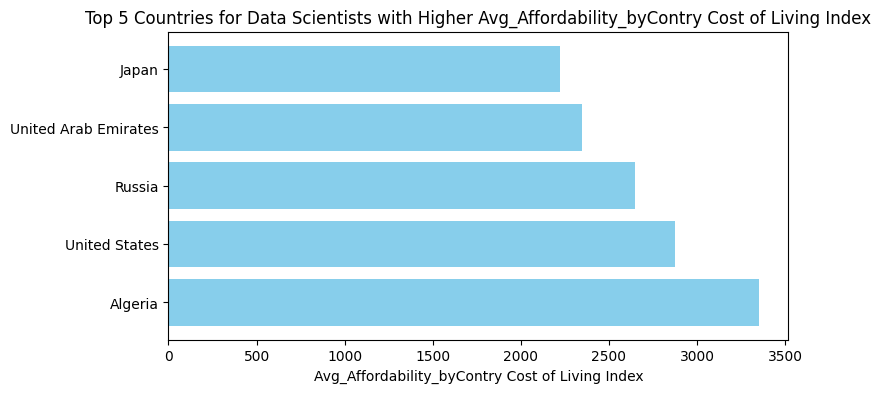

,Country,City_Country,Avg_Affordability_byContry Cost of Living Index
0,Algeria,"Algiers, Algeria",3351.206434
1,United States,"El Paso, TX, United States",2874.062114
2,Russia,"Rostov-na-donu, Russia",2647.975078
3,United Arab Emirates,"Sharjah, United Arab Emirates",2345.502753
4,Japan,"Nagoya, Japan",2221.634488


In [55]:
plot_index(top5_Country_livingCost,'Country','Avg_Affordability_byContry Cost of Living Index')
top5_Country_livingCost

### Top 5 Countries with respect to Rent Index

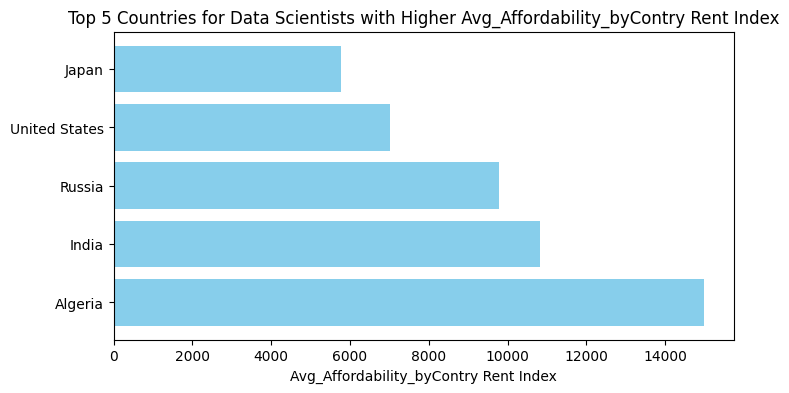

,Country,City_Country,Avg_Affordability_byContry Rent Index
0,Algeria,"Algiers, Algeria",14992.503748
1,India,"Jammu, India",10816.573902
2,Russia,"Rostov-na-donu, Russia",9781.357883
3,United States,"Akron, OH, United States",7018.233773
4,Japan,"Osaka, Japan",5767.250257


In [56]:
plot_index(top5_Country_rent,'Country','Avg_Affordability_byContry Rent Index')
top5_Country_rent

### Top 5 Countries with respect to Cost of Living Plus Rent Index

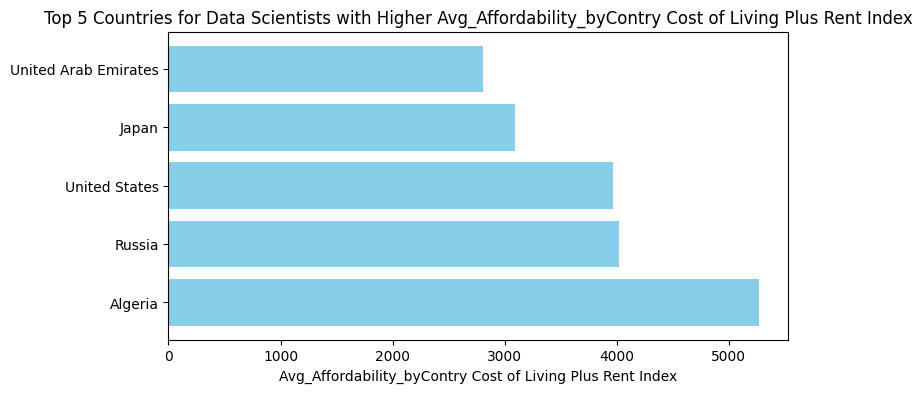

,Country,City_Country,Avg_Affordability_byContry Cost of Living Index
0,Algeria,"Algiers, Algeria",3351.206434
1,United States,"El Paso, TX, United States",2874.062114
2,Russia,"Rostov-na-donu, Russia",2647.975078
3,United Arab Emirates,"Sharjah, United Arab Emirates",2345.502753
4,Japan,"Nagoya, Japan",2221.634488


In [57]:
plot_index(top5_Country_livingplusRent,'Country','Avg_Affordability_byContry Cost of Living Plus Rent Index')
top5_Country_livingCost

### Top 5 Countries with respect to Groceries Index

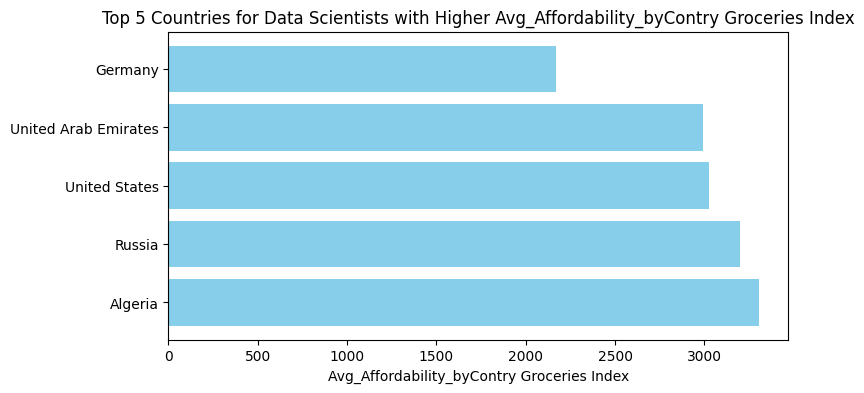

,Country,City_Country,Avg_Affordability_byContry Cost of Living Index
0,Algeria,"Algiers, Algeria",3351.206434
1,United States,"El Paso, TX, United States",2874.062114
2,Russia,"Rostov-na-donu, Russia",2647.975078
3,United Arab Emirates,"Sharjah, United Arab Emirates",2345.502753
4,Japan,"Nagoya, Japan",2221.634488


In [58]:
plot_index(top5_Country_groceries,'Country','Avg_Affordability_byContry Groceries Index')
top5_Country_livingCost

### Top 5 Countries with respect to Restaurant Price Index

In [59]:
top5_Country_restaurantPrice

,Country,City_Country,Avg_Affordability_byContry Restaurant Price Index
0,Algeria,"Algiers, Algeria",4810.004810
1,Japan,"Nagoya, Japan",4171.840079
2,United States,"El Paso, TX, United States",3335.773213
3,United Arab Emirates,"Sharjah, United Arab Emirates",3125.849416
4,Russia,"Yekaterinburg, Russia",3061.959654


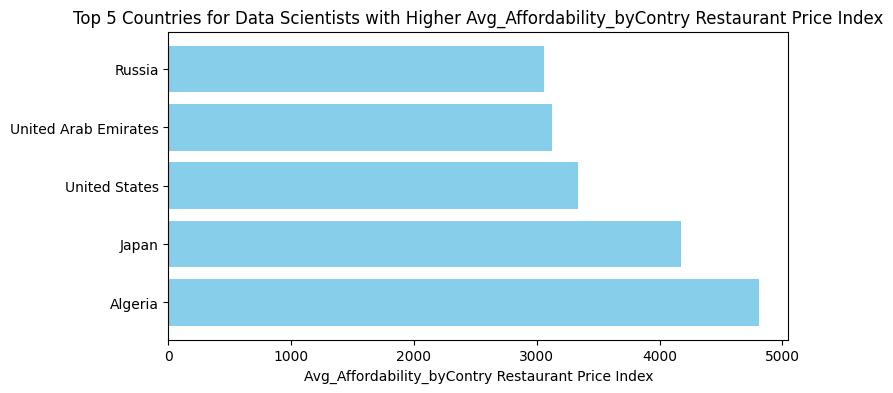

,Country,City_Country,Avg_Affordability_byContry Restaurant Price Index
0,Algeria,"Algiers, Algeria",4810.004810
1,Japan,"Nagoya, Japan",4171.840079
2,United States,"El Paso, TX, United States",3335.773213
3,United Arab Emirates,"Sharjah, United Arab Emirates",3125.849416
4,Russia,"Yekaterinburg, Russia",3061.959654


In [60]:
plot_index(top5_Country_restaurantPrice,'Country','Avg_Affordability_byContry Restaurant Price Index')
top5_Country_restaurantPrice

### Top 5 Countries with respect to Local Purchasing Power Index

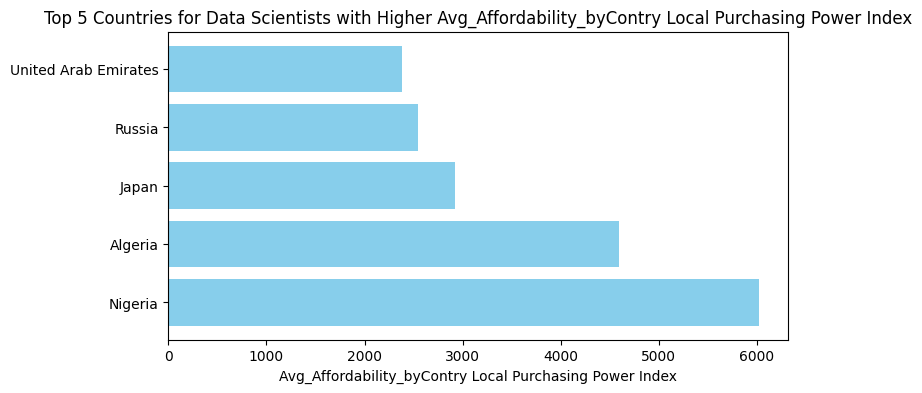

,Country,City_Country,Avg_Affordability_byContry Local Purchasing Power Index
0,Nigeria,"Lagos, Nigeria",6024.096386
1,Algeria,"Algiers, Algeria",4591.368228
2,Japan,"Nagoya, Japan",2927.339258
3,Russia,"Kazan, Russia",2541.106129
4,United Arab Emirates,"Ajman, United Arab Emirates",2382.925818


In [61]:
plot_index(top5_Country_localPurchasingPower,'Country','Avg_Affordability_byContry Local Purchasing Power Index')
top5_Country_localPurchasingPower

## Top 5 Countries based on Experience/Education Level where salary will go the farthest with respect to each individual index 

In [62]:
# top countries based on exp_level

for column in index_columns:
    calculate_affordability(mergedDF_dataScientists_livingCost, column, 'Avg_salary_experience_level')


In [63]:
# function to find top countries based on experience, education level

def topCountries_level_affordability(df,name_column, level):
    country_affordability = {}
    
    if name_column == "Education":
        for column in index_columns:
            top_affordability = df[df[name_column]==level].sort_values(by=f'Avg_Affordability_Education_level {column}', ascending=False)\
                                    [['Country', name_column, f'Avg_Affordability_Education_level {column}']]
            
            unique_countries = top_affordability['Country'].unique()  # Get unique countries
        
            # Iterate through unique countries
            for country in unique_countries:
                country_rows = top_affordability[top_affordability['Country'] == country]
                country_affordability[column] = top_affordability.groupby('Country').head(1)

            country_affordability[column] = country_affordability[column].reset_index(drop=True)

        return country_affordability

            
    else:
        
        for column in index_columns:
            top_affordability = df[df[name_column]==level].sort_values(by=f'Avg_Affordability_Exp_level {column}', ascending=False)\
                                     [['Country', name_column, f'Avg_Affordability_Exp_level {column}']]
        
            unique_countries = top_affordability['Country'].unique()  # Get unique countries

            # Iterate through unique countries
            for country in unique_countries:
                country_rows = top_affordability[top_affordability['Country'] == country]
                country_affordability[column] = top_affordability.groupby('Country').head(1)

            country_affordability[column] = country_affordability[column].reset_index(drop=True)

        return country_affordability


#### Mid level Data Scientists

In [64]:
exp_level = "Mid-level"  # Replace this with the desired expereince level
exp_level_affordability = topCountries_level_affordability(mergedDF_dataScientists_livingCost,
                                                           'experience_level',exp_level)

In [65]:
exp_level_dataframes = list(exp_level_affordability.values())
top5_explevel_livingCost = exp_level_dataframes[0].head()
top5_explevel_rent = exp_level_dataframes[1].head()
top5_explevel_livingplusRent = exp_level_dataframes[2].head()
top5_explevel_groceries = exp_level_dataframes[3].head()
top5_explevel_restaurantPrice = exp_level_dataframes[4].head()
top5_explevel_localPurchasingPower = exp_level_dataframes[5].head()

### Top 5 Countries for Mid-level Data Scientists with respect to Cost of living index

In [66]:
top5_explevel_livingCost

,Country,experience_level,Avg_Affordability_Exp_level Cost of Living Index
0,India,Mid-level,4433.472823
1,Brazil,Mid-level,2897.576234
2,Mexico,Mid-level,2706.957416
3,Nigeria,Mid-level,2469.110635
4,Poland,Mid-level,2429.412230


#### Data Scientists having Master's Degree

In [67]:
# top cities/countries for data scientists based on Education 
for column in index_columns:
    calculate_affordability(df_levels_fyi_salaries, column, 'average_salary_by_education')

In [68]:
education_level = "Master's Degree"  # Replace this with the desired education degree
edu_level_affordability = topCountries_level_affordability(df_levels_fyi_salaries,'Education', education_level)


In [69]:
edu_level_dataframes = list(edu_level_affordability.values())
top5_edu_level_livingCost = edu_level_dataframes[0].head()
top5_edu_level_rent = edu_level_dataframes[1].head()
top5_edu_level_livingplusRent = edu_level_dataframes[2].head()
top5_edu_level_groceries = edu_level_dataframes[3].head()
top5_edu_level_restaurantPrice = edu_level_dataframes[4].head()
top5_edu_level_localPurchasingPower = edu_level_dataframes[5].head()

### Top 5 Countries for Data Scientists having Master's Degree with respect to Cost of living index

In [70]:
top5_edu_level_livingCost

,Country,Education,Avg_Affordability_Education_level Cost of Living Index
0,India,Master's Degree,5014.872653
1,Russia,Master's Degree,3459.081692
2,Costa Rica,Master's Degree,2744.761360
3,China,Master's Degree,2640.579019
4,Spain,Master's Degree,2138.804232


`By calculating the Affordability for each index, we are essentially taking into account the fact that a higher salary can offset the impact of a higher index(Cost of Living Index, Rent Index, Living Plus Rent Index, Groceries Index, Restaurant Price Index and Local Purchasing Power Index), making it more feasible for Data Scientists to afford their expenses in a particular city or country.`

`Higher Affordability Index Value`: A higher value of Affordability for each index indicates that, on average, the combination of salary and cost of each individual index makes it more affordable to live in that country. This means that even though the cost of each index might be higher, the higher salaries help offset the expenses, resulting in a better overall affordability.

`Lower Affordability Index Value`: Conversely, a lower value suggests that the combination of salary and cost of each individual index makes it relatively less affordable to live in that city or country. Here, the higher cost combined with lower salaries may contribute to the reduced affordability.